In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Jupyter Notebook: Predicting Airbnb Listing Prices Using Regression Models

## Introduction

# In this notebook, we aim to predict the `log_price` of Airbnb listings using regression models. We will perform Exploratory Data Analysis (EDA), preprocess the data, and build both simple and multiple linear regression models. The dataset contains various features about Airbnb listings, such as property type, room type, amenities, location, and host information.

## Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import zipfile
import pandas as pd

# Path to the zip file
zip_file_path = 'Airbnb_Data.csv.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the contents of the zip file (optional)
    print(zip_ref.namelist())  # This prints the names of files inside the zip

    # Extract the CSV file
    zip_ref.extractall()  # This extracts the file(s) in the current directory

# Assuming the extracted file is called 'Airbnb_Data.csv', load it into a Pandas DataFrame
df = pd.read_csv('Airbnb_Data.csv')



['Airbnb_Data.csv']


In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


# 1. Drop rows with any null values

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 1 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38502 non-null  int64  
 1   log_price               38502 non-null  float64
 2   property_type           38502 non-null  object 
 3   room_type               38502 non-null  object 
 4   amenities               38502 non-null  object 
 5   accommodates            38502 non-null  int64  
 6   bathrooms               38502 non-null  float64
 7   bed_type                38502 non-null  object 
 8   cancellation_policy     38502 non-null  object 
 9   cleaning_fee            38502 non-null  bool   
 10  city                    38502 non-null  object 
 11  description             38502 non-null  object 
 12  first_review            38502 non-null  object 
 13  host_has_profile_pic    38502 non-null  object 
 14  host_identity_verified  38502 non-null

# 2. Converting Data Types


In [9]:
# Convert 'host_since' to datetime using .loc to avoid SettingWithCopyWarning
df.loc[:, 'host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Ensure 'zipcode' is treated as a string using .loc
df.loc[:, 'zipcode'] = df['zipcode'].astype(str)

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_32044/2827664633.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'host_since'] = pd.to_datetime(df['host_since'], errors='coerce')


# 3. Feature Engineering

In [10]:
# Extract the number of amenities from the 'amenities' column using .loc
df.loc[:, 'num_amenities'] = df['amenities'].apply(lambda x: len(x.strip('{}').replace('"', '').split(',')))

# Parse 'amenities' column into a list using .loc (optional if you want to work with it later)
df.loc[:, 'amenities_list'] = df['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

# Create a new feature 'price_per_accommodate' (log_price divided by accommodates) using .loc
df.loc[:, 'price_per_accommodate'] = df['log_price'] / df['accommodates']


# 4. Remove Irrelevant or Unnecessary Columns

In [11]:
# Drop columns that are not useful for analysis or modeling
columns_to_drop = ['id', 'description', 'thumbnail_url', 'name']
df.drop(columns=columns_to_drop, inplace=True)


In [12]:
# 5. Final Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 1 to 74110
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   log_price               38502 non-null  float64       
 1   property_type           38502 non-null  object        
 2   room_type               38502 non-null  object        
 3   amenities               38502 non-null  object        
 4   accommodates            38502 non-null  int64         
 5   bathrooms               38502 non-null  float64       
 6   bed_type                38502 non-null  object        
 7   cancellation_policy     38502 non-null  object        
 8   cleaning_fee            38502 non-null  bool          
 9   city                    38502 non-null  object        
 10  first_review            38502 non-null  object        
 11  host_has_profile_pic    38502 non-null  object        
 12  host_identity_verified  38502 non-null  object

In [13]:
df.isnull().sum()


log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
num_amenities             0
amenities_list            0
price_per_accommodate     0
dtype: int64

In [14]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,num_amenities,amenities_list,price_per_accommodate
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,15,"[Wireless Internet, Air conditioning, Kitchen,...",0.732843
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,Harlem,10,92.0,10027,1.0,3.0,19,"[TV, Cable TV, Wireless Internet, Air conditio...",0.995347
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,10,"[TV, Wireless Internet, Heating, Smoke detecto...",2.221326
7,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,...,-118.260439,Downtown,9,93.0,90015,1.0,1.0,26,"[TV, Cable TV, Wireless Internet, Wheelchair a...",2.393746
8,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Richmond District,159,99.0,94121,1.0,1.0,21,"[TV, Cable TV, Wireless Internet, Pets live on...",2.393746


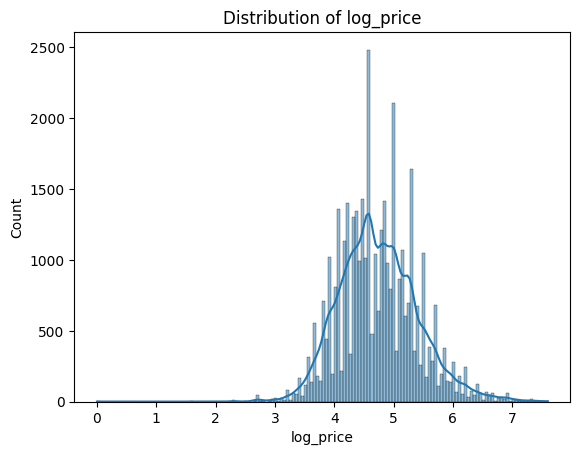

In [15]:
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of log_price')
plt.show()


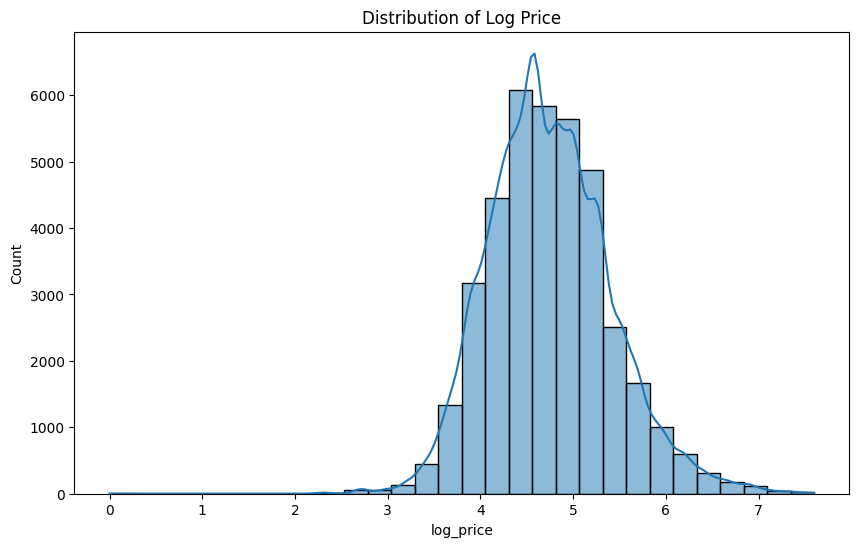

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title('Distribution of Log Price')
plt.show()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_32044/488534769.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


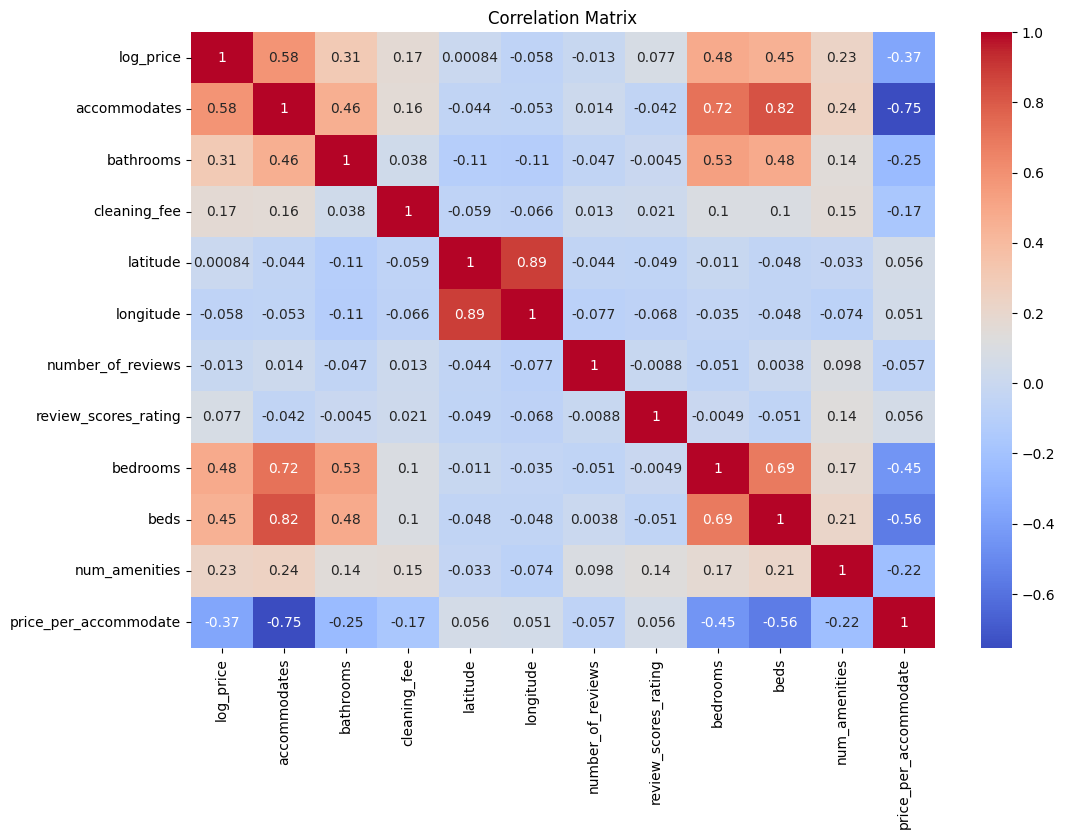

In [17]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing


In [18]:
for var in categorical_vars:
    print(f"{var}: {df[var].nunique()} unique values")



NameError: name 'categorical_vars' is not defined

In [ ]:
for var in categorical_vars:
    print(f"\nUnique values in {var}:")
    print(df[var].unique())


In [ ]:
gfhjk

In [ ]:
df.columns

In [19]:
# Handling Categorical Variables
categorical_vars = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood', 'zipcode']
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


In [21]:
# Converting Boolean and 't'/'f' Columns
df['cleaning_fee'] = df['cleaning_fee'].astype(int)
bool_columns = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_columns:
    df[col] = df[col].map({'t': 1, 'f': 0})


In [22]:
# Converting Percentage Strings to Numeric
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0


In [23]:
df.columns

Index(['log_price', 'amenities', 'accommodates', 'bathrooms', 'cleaning_fee',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since',
       ...
       'zipcode_94122.0', 'zipcode_94123', 'zipcode_94124', 'zipcode_94127',
       'zipcode_94131', 'zipcode_94132', 'zipcode_94133', 'zipcode_94134',
       'zipcode_94158',
       'zipcode_95202\r\r\r\r\r\r\n\r\r\r\r\r\r\n\r\r\r\r\r\r\n94158'],
      dtype='object', length=1303)

In [24]:
for var in categorical_vars:
    print(f"{var}: {df[var].nunique()} unique values")



KeyError: 'property_type'

In [ ]:
# Dropping Irrelevant Columns
irrelevant_columns = ['id', 'description', 'first_review', 'host_since', 'last_review', 'name', 'thumbnail_url', 'amenities']
df.drop(irrelevant_columns, axis=1, inplace=True)


In [ ]:
adfasf

In [ ]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Fill missing values in numerical columns with the median
for col in ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
# Dropping irrelevant columns
data = df.drop(columns=['id', 'name', 'description', 'amenities', 'first_review', 'last_review', 'host_response_rate', 'host_since', 'thumbnail_url'])


In [ ]:
# Feature selection for simple linear regression (M1)
X_simple = data[['accommodates']].values  # Single predictor: accommodates
y_simple = data['log_price'].values